# CA5

In this project we design a nural network using tensorflow and use it to classify english alphabets. Then we analyse impact of different parameters such as loss function, number of epochs, optimizer and regularization on out netowrk.

In [5]:
from google.colab import drive


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
import numpy as np
from sklearn.metrics import classification_report 
import tensorflow_addons as tfa

In [2]:
pip install tensorflow_addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 6.3 MB/s 


In [6]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## **Part** **1** : **Data** **Preprocessing**

In [2]:
df = pd.read_csv('/content/gdrive/MyDrive/AI-CA5-Dataset/A_Z Handwritten Data.csv')
df.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 785 entries, 0 to 0.648
dtypes: int64(785)
memory usage: 2.2 GB


In [3]:
data = df.drop('0',axis = 1).astype('uint8')
labels = df['0']

In [20]:
data.shape

(372450, 784)

In [4]:
alphabets_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'} 

In [22]:

alphabeticLabels = labels.map(alphabets_dict)
print("Numbe of images: ", len(data))
print("Classes ", alphabeticLabels.unique())
print("Classes Counts: \n",pd.Series(alphabeticLabels).value_counts(sort = True))


Numbe of images:  372450
Classes  ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z']
Classes Counts: 
 O    57825
S    48419
U    29008
C    23409
T    22495
P    19341
N    19010
A    13869
M    12336
L    11586
R    11566
E    11440
Y    10859
W    10784
D    10134
B     8668
J     8493
H     7218
X     6272
Z     6076
Q     5812
G     5762
K     5603
V     4182
F     1163
I     1120
Name: 0, dtype: int64


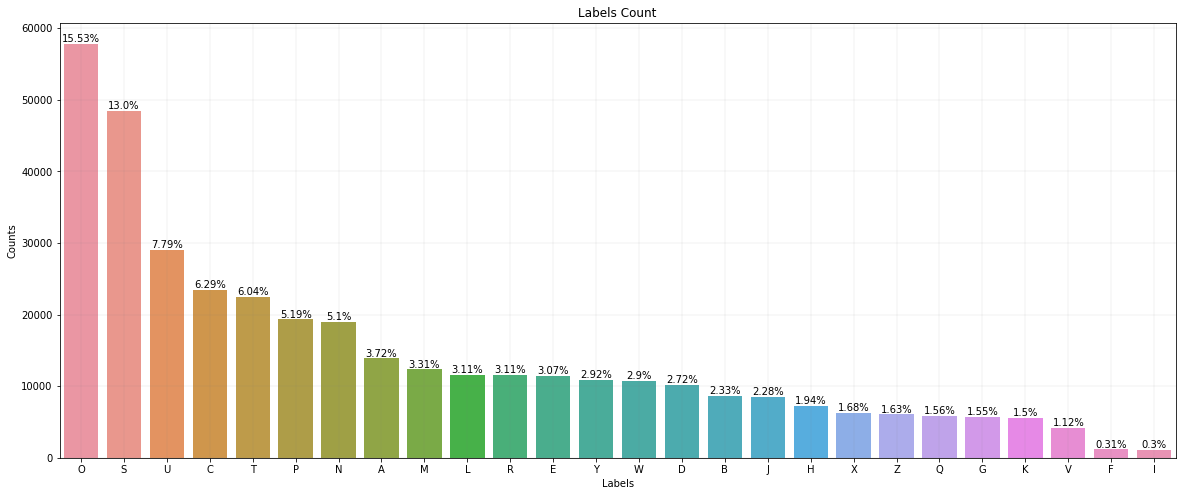

In [23]:
import seaborn as sns

plt.figure(figsize=(20,8))
ax = sns.barplot( x='index', y='count',   data = pd.Series(alphabeticLabels).value_counts(sort = True).reset_index(name= "count"))

for i in ax.patches:
    v1 = round((i.get_height()/len(df))*100, 2)
    ax.annotate(f'{v1}%', (i.get_x()+0.4, i.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

plt.title("Labels Count")
plt.ylabel("Counts")
plt.xlabel("Labels")
plt.grid(True, linewidth=0.1, color='gray', linestyle='-')
plt.show()

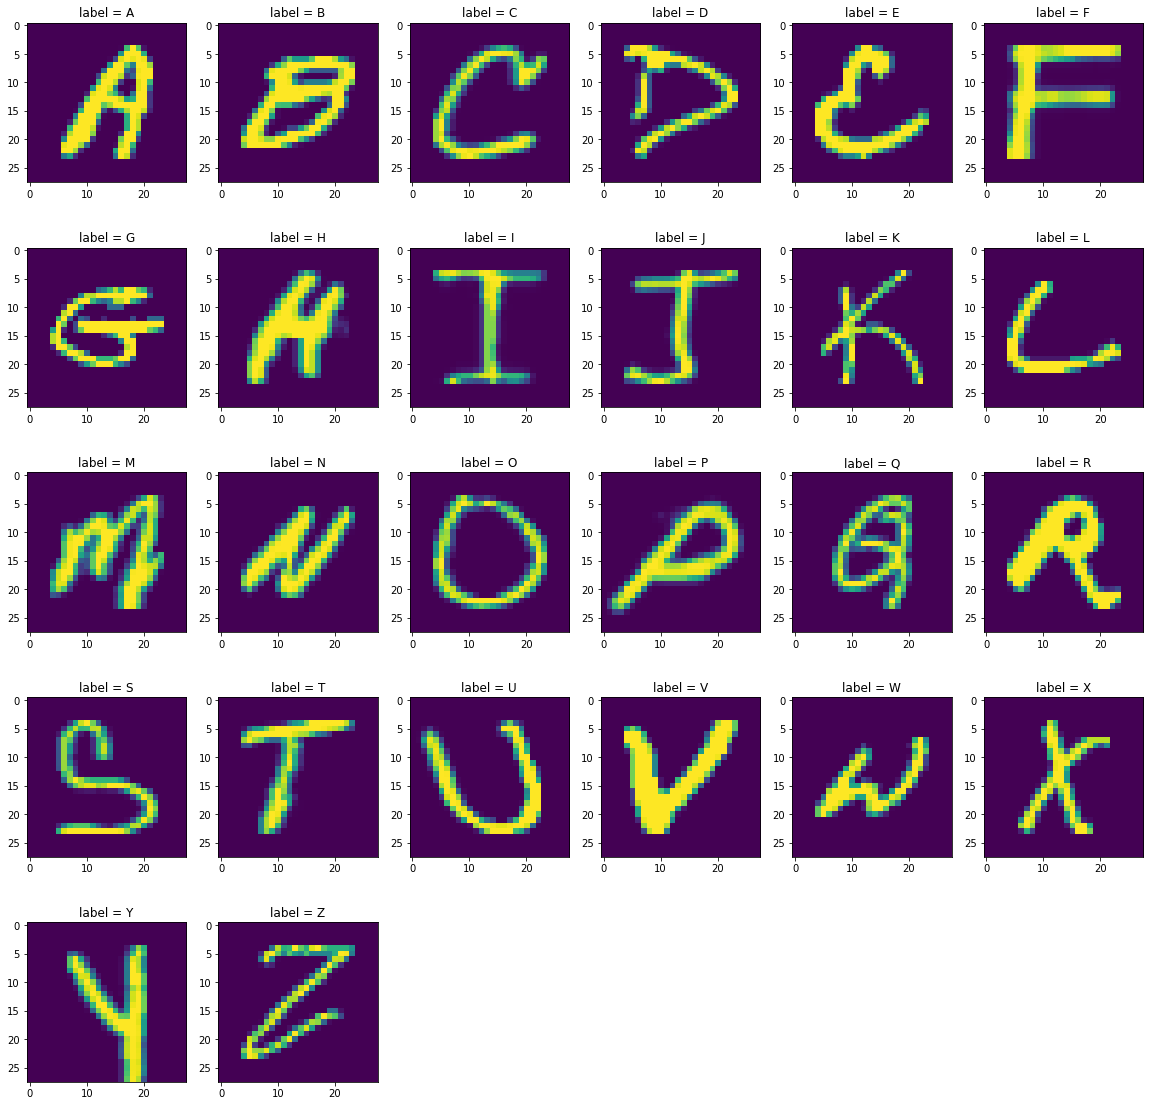

In [37]:
labels_list = list(set(labels))
plt.figure(figsize=(20,20))
for i,label in enumerate(labels_list):
    index = list(labels).index(label)
    plt.subplot(5,6,i+1)
    plt.imshow(data.iloc[index].values.reshape( 28,28))
    plt.title(f'label = {alphabets_dict[label]}')
plt.show()
#data = data.values.reshape((len(data) , 28,28))

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels , test_size=0.2, shuffle=True, random_state=1,stratify=labels)

In [6]:
del df
del data
del labels

### One hot encoding

In one hot encoding we express the categories into sets of bits so that for each set of bits, only one bit is true all the time, while all the others are zero. One hot encoding makes our training data more useful and expressive, and it can be rescaled easily. 

In the output layer there is one neuron for each class, and a Softmax activation function to output the proper class based on the probabilities of the input belonging to each class. The output of a Softmax is a vector with probabilities of each possible outcome. Using one-hot encoding forces the network to have a single high-activation output when a certain input is present. Which helps to produce discrete output (we always extract the output neuron with the highest activation using tf.argmax, even though the network hasn't learned to produce the perfect one-hot encoding we'll be able to extract without doubt the most likely correct output ).


In [7]:
import numpy as np
y_train_onehot = np.eye(26)[y_train]
y_test_onehot = np.eye(26)[y_test]


## Part 2: Design Neural Network

In [8]:
 
model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(784,)),
   # keras.layers.Dense(256, activation='relu', trainable=False),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(26, activation='softmax'),
])
 

num_params = (input_size + bias) * output_size
bias = 1

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 26)                1690      
                                                                 
Total params: 243,802
Trainable params: 202,650
Non-trainable params: 41,152
_________________________________________________________________


Normalize

In [8]:
X_train = X_train/255
X_test = X_test/255

In [11]:


def model_classification_report(model_, X_train, X_test, y_train, y_test):

    y_train_pred = np.argmax(model.predict(X_train), axis=1)
    y_test_pred = np.argmax(model.predict(X_test), axis=1)
 

    print("Train:")
    print(classification_report( y_train , y_train_pred  ))
    print("Test:")
    print(classification_report( y_test , y_test_pred ))

In [9]:
import numpy
from sklearn.metrics import classification_report 
from matplotlib import pyplot as plot

def plot_acc_and_loss(model_, model_history):

    plot.figure(figsize=(10,4))

    plot.subplot(1,2,1)
    plot.plot(model_history['accuracy'], color = 'c', label='Train')
    plot.plot(model_history['val_accuracy'], color = 'm', label='Test')
    plot.title('Model Accuracy')
    plot.ylabel('Accuracy')
    plot.xlabel('Epoch')
    plot.legend()
    plot.grid()

    plot.subplot(1,2,2)
    plot.plot(model_history['loss'], color = 'c', label='Train')
    plot.plot(model_history['val_loss'], color = 'm', label='Test')
    plot.title('Model Loss')
    plot.ylabel('Loss')
    plot.xlabel('Epoch')
    plot.legend()
    plot.grid()

    plot.tight_layout()
    plot.show()

Epoch 1/10
9312/9312 [==============================] - 48s 5ms/step - loss: 0.6068 - accuracy: 0.8352 - f1_score: 0.7759 - recall_1: 0.7636 - precision: 0.9292 - val_loss: 0.3057 - val_accuracy: 0.9170 - val_f1_score: 0.8841 - val_recall_1: 0.8938 - val_precision: 0.9463
Epoch 2/10
9312/9312 [==============================] - 50s 5ms/step - loss: 0.2359 - accuracy: 0.9350 - f1_score: 0.9081 - recall_1: 0.9176 - precision: 0.9563 - val_loss: 0.2130 - val_accuracy: 0.9414 - val_f1_score: 0.9183 - val_recall_1: 0.9280 - val_precision: 0.9589
Epoch 3/10
9312/9312 [==============================] - 46s 5ms/step - loss: 0.1651 - accuracy: 0.9543 - f1_score: 0.9356 - recall_1: 0.9441 - precision: 0.9673 - val_loss: 0.1589 - val_accuracy: 0.9564 - val_f1_score: 0.9400 - val_recall_1: 0.9487 - val_precision: 0.9677
Epoch 4/10
9312/9312 [==============================] - 47s 5ms/step - loss: 0.1316 - accuracy: 0.9637 - f1_score: 0.9489 - recall_1: 0.9565 - precision: 0.9729 - val_loss: 0.1308 -

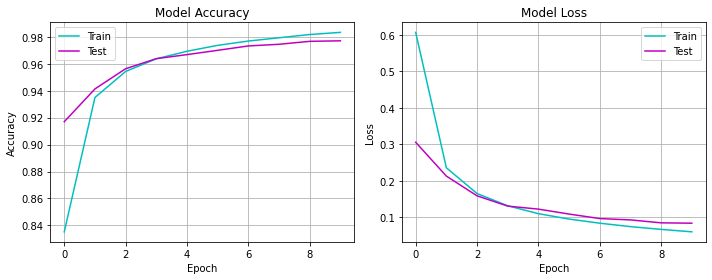

In [15]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy',tfa.metrics.F1Score(num_classes=26, average='macro'), keras.metrics.Recall(), keras.metrics.Precision()])
hist=model.fit(X_train, y_train_onehot, validation_data=(X_test, y_test_onehot), epochs=10, batch_size=32)
plot_acc_and_loss(model,hist.history)

**Effect of Optimizer**

The problem with SGD is that while it tries to reach minima because of the high oscillation we can’t increase the learning rate. So it takes time to converge. In this algorithm, Momentum is a technique that uses exponentially Weighted Averages to compute Gradient and used this Gradient to update parameter.Thus, 
helps gradient vectors to accelerate in the right directions , improves training speed and helps the network to get out of local minima. 





Epoch 1/10
9312/9312 [==============================] - 38s 4ms/step - loss: 0.0365 - accuracy: 0.9897 - f1_score: 0.9855 - recall: 0.9883 - precision: 0.9913 - val_loss: 0.0695 - val_accuracy: 0.9814 - val_f1_score: 0.9734 - val_recall: 0.9799 - val_precision: 0.9838
Epoch 2/10
9312/9312 [==============================] - 38s 4ms/step - loss: 0.0316 - accuracy: 0.9911 - f1_score: 0.9875 - recall: 0.9899 - precision: 0.9924 - val_loss: 0.0574 - val_accuracy: 0.9853 - val_f1_score: 0.9783 - val_recall: 0.9842 - val_precision: 0.9872
Epoch 3/10
9312/9312 [==============================] - 37s 4ms/step - loss: 0.0274 - accuracy: 0.9923 - f1_score: 0.9892 - recall: 0.9913 - precision: 0.9935 - val_loss: 0.0607 - val_accuracy: 0.9842 - val_f1_score: 0.9778 - val_recall: 0.9831 - val_precision: 0.9859
Epoch 4/10
9312/9312 [==============================] - 35s 4ms/step - loss: 0.0239 - accuracy: 0.9932 - f1_score: 0.9904 - recall: 0.9925 - precision: 0.9943 - val_loss: 0.0556 - val_accuracy:

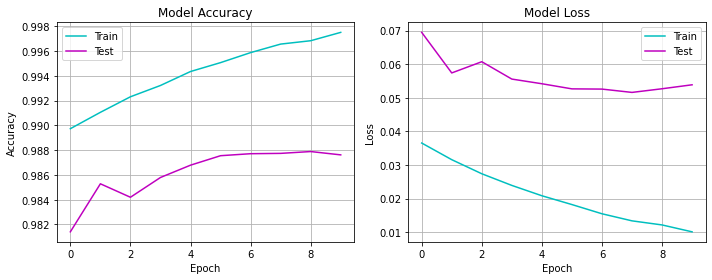

In [17]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01,momentum = 0.5), loss='categorical_crossentropy', metrics=['accuracy',tfa.metrics.F1Score(num_classes=26, average='macro'), keras.metrics.Recall(), keras.metrics.Precision()])
hist=model.fit(X_train, y_train_onehot, validation_data=(X_test, y_test_onehot), epochs=10, batch_size=32)
plot_acc_and_loss(model,hist.history)

Epoch 1/10
9312/9312 [==============================] - 36s 4ms/step - loss: 0.2477 - accuracy: 0.9288 - f1_score: 0.9024 - recall: 0.9109 - precision: 0.9541 - val_loss: 0.1311 - val_accuracy: 0.9615 - val_f1_score: 0.9471 - val_recall: 0.9558 - val_precision: 0.9690
Epoch 2/10
9312/9312 [==============================] - 33s 4ms/step - loss: 0.1018 - accuracy: 0.9702 - f1_score: 0.9581 - recall: 0.9661 - precision: 0.9755 - val_loss: 0.0956 - val_accuracy: 0.9728 - val_f1_score: 0.9613 - val_recall: 0.9689 - val_precision: 0.9773
Epoch 3/10
9312/9312 [==============================] - 34s 4ms/step - loss: 0.0727 - accuracy: 0.9781 - f1_score: 0.9695 - recall: 0.9758 - precision: 0.9817 - val_loss: 0.0855 - val_accuracy: 0.9750 - val_f1_score: 0.9662 - val_recall: 0.9726 - val_precision: 0.9783
Epoch 4/10
9312/9312 [==============================] - 35s 4ms/step - loss: 0.0567 - accuracy: 0.9826 - f1_score: 0.9759 - recall: 0.9809 - precision: 0.9852 - val_loss: 0.0681 - val_accuracy:

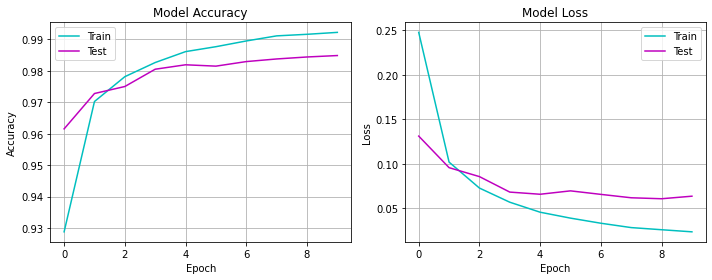

In [12]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01,momentum = 0.9), loss='categorical_crossentropy', metrics=['accuracy',tfa.metrics.F1Score(num_classes=26, average='macro'),keras.metrics.Recall(), keras.metrics.Precision()])
hist=model.fit(X_train, y_train_onehot, validation_data=(X_test, y_test_onehot), epochs=10, batch_size=32)
plot_acc_and_loss(model,hist.history)

Epoch 1/10
9312/9312 [==============================] - 38s 4ms/step - loss: 0.3810 - accuracy: 0.8983 - f1_score: 0.8573 - recall: 0.8745 - precision: 0.9337 - val_loss: 0.2591 - val_accuracy: 0.9328 - val_f1_score: 0.8998 - val_recall: 0.9195 - val_precision: 0.9500
Epoch 2/10
9312/9312 [==============================] - 35s 4ms/step - loss: 0.2323 - accuracy: 0.9434 - f1_score: 0.9196 - recall: 0.9314 - precision: 0.9595 - val_loss: 0.2269 - val_accuracy: 0.9452 - val_f1_score: 0.9233 - val_recall: 0.9275 - val_precision: 0.9649
Epoch 3/10
9312/9312 [==============================] - 35s 4ms/step - loss: 0.1952 - accuracy: 0.9541 - f1_score: 0.9365 - recall: 0.9438 - precision: 0.9671 - val_loss: 0.1900 - val_accuracy: 0.9559 - val_f1_score: 0.9387 - val_recall: 0.9459 - val_precision: 0.9694
Epoch 4/10
9312/9312 [==============================] - 34s 4ms/step - loss: 0.1779 - accuracy: 0.9585 - f1_score: 0.9415 - recall: 0.9494 - precision: 0.9710 - val_loss: 0.2030 - val_accuracy:

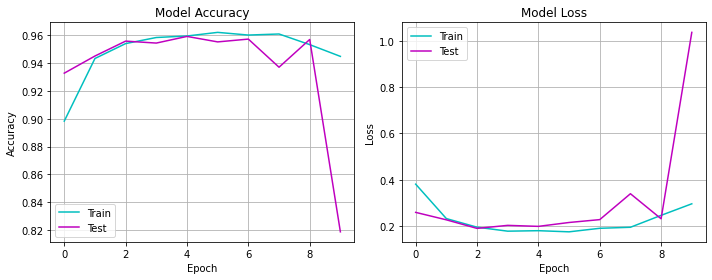

In [11]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01,momentum = 0.98), loss='categorical_crossentropy', metrics=['accuracy',tfa.metrics.F1Score(num_classes=26, average='macro'),keras.metrics.Recall(), keras.metrics.Precision()])
hist=model.fit(X_train, y_train_onehot, validation_data=(X_test, y_test_onehot), epochs=10, batch_size=32)
plot_acc_and_loss(model,hist.history)

### Effect of too large momentum

When the gradient keeps pointing in the same direction, this will increase the size of the steps taken towards the minimum. In this case combination of high learning rate and high momentum,can results in overshooting the global minimum.
Also very large momentum makes the model almost random and the model might just swing back and forward between the local minima. 


We trained our model with four different momnetums 0.5, 0.9, 0.98 and the default value momentum which is zero. As the momentum increase, the accuracy and convergence speed increase, but with momentum = 0.9, the accuracy drops, which means this momentum with this learning rate is to high and has resulted in overshooting the global minimum. With momentum = 0.98 we get even lower accuracy and more fluctuations in the grpah which shows swinging between the local minima.

### Adam optimizer

 Adam optimizer uses the squared gradients to scale the learning rate and takes advantage of momentum by using moving average of the gradient instead of gradient itself. Adam computes individual learning rates for different parameters. It uses estimations of first and second moments of gradient to adapt the learning rate for each weight of the neural network.

Based on the results, Adam works faster than SGD and converges to the global minima in earlier epochs than SGD.

Epoch 1/10
9312/9312 [==============================] - 39s 4ms/step - loss: 0.2613 - accuracy: 0.9468 - f1_score: 0.9274 - recall_1: 0.9304 - precision_1: 0.9759 - val_loss: 0.1692 - val_accuracy: 0.9640 - val_f1_score: 0.9478 - val_recall_1: 0.9578 - val_precision_1: 0.9778
Epoch 2/10
9312/9312 [==============================] - 44s 5ms/step - loss: 0.1124 - accuracy: 0.9743 - f1_score: 0.9630 - recall_1: 0.9688 - precision_1: 0.9843 - val_loss: 0.1378 - val_accuracy: 0.9732 - val_f1_score: 0.9619 - val_recall_1: 0.9683 - val_precision_1: 0.9825
Epoch 3/10
9312/9312 [==============================] - 37s 4ms/step - loss: 0.0801 - accuracy: 0.9807 - f1_score: 0.9726 - recall_1: 0.9770 - precision_1: 0.9874 - val_loss: 0.1159 - val_accuracy: 0.9760 - val_f1_score: 0.9663 - val_recall_1: 0.9722 - val_precision_1: 0.9830
Epoch 4/10
9312/9312 [==============================] - 38s 4ms/step - loss: 0.0647 - accuracy: 0.9839 - f1_score: 0.9772 - recall_1: 0.9812 - precision_1: 0.9892 - val_

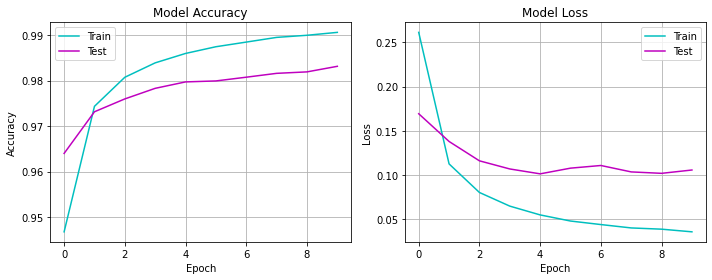

In [12]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy',tfa.metrics.F1Score(num_classes=26, average='macro'),keras.metrics.Recall(), keras.metrics.Precision()])
hist=model.fit(X_train, y_train_onehot, validation_data=(X_test, y_test_onehot), epochs=10, batch_size=32)
plot_acc_and_loss(model,hist.history)

## Part2 : Number of Epochs

* Because datasets are not large enoght, we need to pass the full dataset multiple times to the same neural network. Moreover, since we use Gradient Descent,which is an iterative process, to optimise the learning, updating the weights with single pass or one epoch is not enough.

* In normal datasets training for only one epoch results in underfitting because, gradient descent does not reach a global or local minima after the first epoch.

* When the number of epochs is too large, the training model learns patterns that are specific to sample data to a great extent. This makes the model incapable to perform well on a new dataset. In other words, the model loses generalization capacity by overfitting to the training data. 
  
  How to handle overfitting causzed by large number of epochs:
  * Early stopping: Early stopping is a method that allows you to specify an arbitrarily large number of training epochs and stop training once the model performance stops improving on the validation dataset.
  * Dropout: Dropout works by probabilistically removing inputs to a layer, which may be input variables in the data sample or activations from a previous layer. It has the effect of simulating a large number of networks with very different network structure and, in turn, making nodes in the network generally more robust to the inputs.

As you can see accuracy drops after 11th epoch.



Epoch 1/20
9312/9312 [==============================] - 42s 4ms/step - loss: 0.0504 - accuracy: 0.9917 - f1_score: 0.9879 - recall_3: 0.9907 - precision_3: 0.9939 - val_loss: 0.1171 - val_accuracy: 0.9845 - val_f1_score: 0.9775 - val_recall_3: 0.9830 - val_precision_3: 0.9882
Epoch 2/20
9312/9312 [==============================] - 37s 4ms/step - loss: 0.0314 - accuracy: 0.9932 - f1_score: 0.9899 - recall_3: 0.9921 - precision_3: 0.9954 - val_loss: 0.1160 - val_accuracy: 0.9863 - val_f1_score: 0.9791 - val_recall_3: 0.9849 - val_precision_3: 0.9889
Epoch 3/20
9312/9312 [==============================] - 38s 4ms/step - loss: 0.0284 - accuracy: 0.9935 - f1_score: 0.9905 - recall_3: 0.9926 - precision_3: 0.9955 - val_loss: 0.1134 - val_accuracy: 0.9855 - val_f1_score: 0.9791 - val_recall_3: 0.9841 - val_precision_3: 0.9886
Epoch 4/20
9312/9312 [==============================] - 38s 4ms/step - loss: 0.0283 - accuracy: 0.9935 - f1_score: 0.9907 - recall_3: 0.9928 - precision_3: 0.9955 - val_

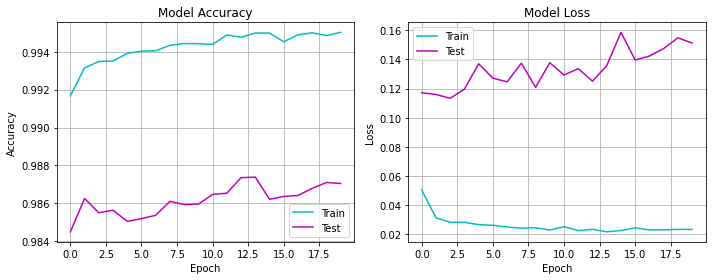

In [14]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy',tfa.metrics.F1Score(num_classes=26, average='macro'),keras.metrics.Recall(), keras.metrics.Precision()])
hist=model.fit(X_train, y_train_onehot, validation_data=(X_test, y_test_onehot), epochs=20, batch_size=32)
plot_acc_and_loss(model,hist.history)

##Part3: Impact of loss function:

There are two reasons why Mean Squared Error(MSE) is a bad choice for binary classification problems:

* Using MSE means that we assume that the underlying data has been generated from a normal distribution (a bell-shaped curve). In Bayesian terms this means we assume a Gaussian prior.While in reality, a dataset that can be classified into two categories (i.e binary) is not from a normal distribution

* Secondly, the MSE function is non-convex for binary classification. In simple terms, if a binary classification model is trained with MSE Cost function, it is not guaranteed to minimize the Cost function. This is because MSE function expects real-valued inputs in range(-∞, ∞), while binary classification models output probabilities in range(0,1) through the sigmoid/logistic function.


MSE is a good choice for a Cost function when we are doing Linear Regression.Because with a logistic output we want to very heavily penalize cases where model is predicting the wrong output class (predicted value is either right or wrong) but in real-valued regression, where MSE is appropriate, the goal is just to be close.

As you can see, by useing MSE loss, train loss keeps increasing and test loss has sharp fluctuations.


Epoch 1/10
9312/9312 [==============================] - 41s 4ms/step - loss: 6.1220e-04 - accuracy: 0.9897 - f1_score: 0.9856 - recall_2: 0.9887 - precision_2: 0.9918 - val_loss: 0.0012 - val_accuracy: 0.9817 - val_f1_score: 0.9731 - val_recall_2: 0.9806 - val_precision_2: 0.9844
Epoch 2/10
9312/9312 [==============================] - 38s 4ms/step - loss: 6.2868e-04 - accuracy: 0.9896 - f1_score: 0.9857 - recall_2: 0.9888 - precision_2: 0.9917 - val_loss: 0.0011 - val_accuracy: 0.9821 - val_f1_score: 0.9742 - val_recall_2: 0.9813 - val_precision_2: 0.9844
Epoch 3/10
9312/9312 [==============================] - 37s 4ms/step - loss: 6.2501e-04 - accuracy: 0.9899 - f1_score: 0.9858 - recall_2: 0.9891 - precision_2: 0.9919 - val_loss: 0.0012 - val_accuracy: 0.9816 - val_f1_score: 0.9736 - val_recall_2: 0.9806 - val_precision_2: 0.9841
Epoch 4/10
9312/9312 [==============================] - 39s 4ms/step - loss: 6.2870e-04 - accuracy: 0.9899 - f1_score: 0.9858 - recall_2: 0.9891 - precision_

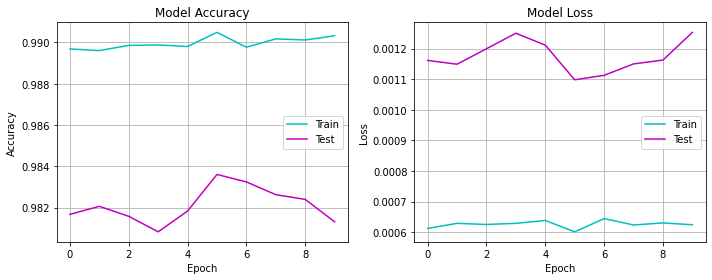

In [13]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss=keras.losses.mean_squared_error, metrics=['accuracy',tfa.metrics.F1Score(num_classes=26, average='macro'),keras.metrics.Recall(), keras.metrics.Precision()])
hist=model.fit(X_train, y_train_onehot, validation_data=(X_test, y_test_onehot), epochs=10, batch_size=32)
plot_acc_and_loss(model,hist.history)

## Part4: imapct of Regularization:

Regularization is a technique used for tuning the function by adding an additional penalty term in the error function. The additional term controls the excessively fluctuating function such that the coefficients don’t take extreme values.

* L2 regularization : L1 and L2 are the most common types of regularization. These update the general cost function by adding another term known as the regularization term.Due to the addition of this regularization term, the values of weight matrices decrease because it assumes that a neural network with smaller weight matrices leads to simpler models. Therefore, it will also reduce overfitting to quite an extent. L2 regularization forces the weights to decay towards zero by adding squared magnitude of coefficient as penalty term to the loss function.

* Dropout: Dropout works by randomly disabling neurons and their corresponding connections. This prevents the network from relying too much on single neurons and forces all neurons to learn to generalize better.
One major issue in learning large networks is co-adaptation. In such a network, if all the weights are learned together it is common that some of the connections will have more predictive capability than the others.
This could not be prevented with L2 regularization, because it regularizes based on the predictive capability of the connections.But drouput can resolve the co-adaptation problem.

Using regularization, we get smoother curves and as you can see in the graphs in this model dropout works better than L2 regularization.
 

Epoch 1/10
9312/9312 [==============================] - 41s 4ms/step - loss: 0.2517 - accuracy: 0.9363 - f1_score: 0.9122 - recall: 0.9213 - precision: 0.9572 - val_loss: 0.1577 - val_accuracy: 0.9638 - val_f1_score: 0.9507 - val_recall: 0.9590 - val_precision: 0.9705
Epoch 2/10
9312/9312 [==============================] - 39s 4ms/step - loss: 0.1331 - accuracy: 0.9700 - f1_score: 0.9581 - recall: 0.9661 - precision: 0.9752 - val_loss: 0.1225 - val_accuracy: 0.9732 - val_f1_score: 0.9618 - val_recall: 0.9697 - val_precision: 0.9780
Epoch 3/10
9312/9312 [==============================] - 39s 4ms/step - loss: 0.1083 - accuracy: 0.9767 - f1_score: 0.9673 - recall: 0.9737 - precision: 0.9805 - val_loss: 0.1216 - val_accuracy: 0.9729 - val_f1_score: 0.9601 - val_recall: 0.9699 - val_precision: 0.9768
Epoch 4/10
9312/9312 [==============================] - 39s 4ms/step - loss: 0.0941 - accuracy: 0.9799 - f1_score: 0.9723 - recall: 0.9776 - precision: 0.9829 - val_loss: 0.1174 - val_accuracy:

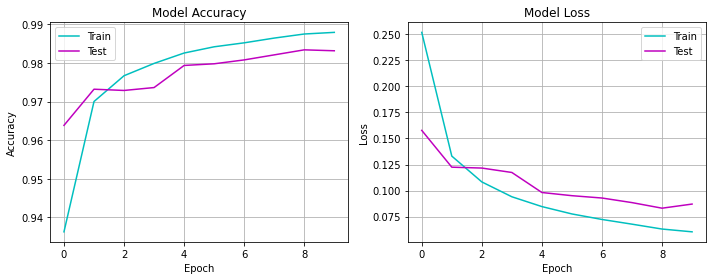

In [10]:
reg_model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(784,)),
   # keras.layers.Dense(256, activation='relu', trainable=False),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.L2(l2=0.0001)),
    keras.layers.Dense(64, activation='relu',kernel_regularizer=keras.regularizers.L2(l2=0.0001)),
    keras.layers.Dense(26, activation='softmax'),
])

reg_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy',tfa.metrics.F1Score(num_classes=26, average='macro'),keras.metrics.Recall(), keras.metrics.Precision()])
hist=reg_model.fit(X_train, y_train_onehot, validation_data=(X_test, y_test_onehot), epochs=10, batch_size=32)
plot_acc_and_loss(reg_model,hist.history)

Epoch 1/10
9312/9312 [==============================] - 41s 4ms/step - loss: 0.2581 - accuracy: 0.9261 - f1_score: 0.8968 - recall_1: 0.9078 - precision_1: 0.9516 - val_loss: 0.1173 - val_accuracy: 0.9664 - val_f1_score: 0.9541 - val_recall_1: 0.9607 - val_precision_1: 0.9735
Epoch 2/10
9312/9312 [==============================] - 39s 4ms/step - loss: 0.1211 - accuracy: 0.9655 - f1_score: 0.9517 - recall_1: 0.9599 - precision_1: 0.9724 - val_loss: 0.1004 - val_accuracy: 0.9718 - val_f1_score: 0.9617 - val_recall_1: 0.9670 - val_precision_1: 0.9774
Epoch 3/10
9312/9312 [==============================] - 52s 6ms/step - loss: 0.0957 - accuracy: 0.9726 - f1_score: 0.9619 - recall_1: 0.9688 - precision_1: 0.9775 - val_loss: 0.0853 - val_accuracy: 0.9758 - val_f1_score: 0.9659 - val_recall_1: 0.9733 - val_precision_1: 0.9798
Epoch 4/10
9312/9312 [==============================] - 38s 4ms/step - loss: 0.0822 - accuracy: 0.9761 - f1_score: 0.9661 - recall_1: 0.9729 - precision_1: 0.9802 - val_

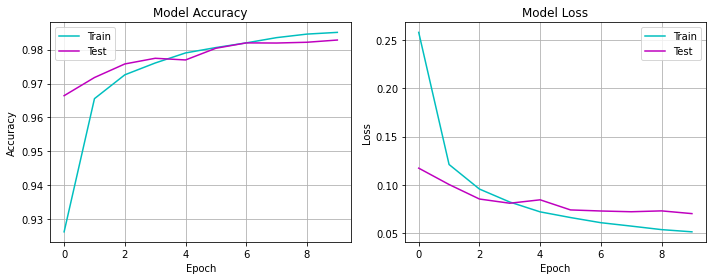

In [11]:
drop_model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(784,)),
   # keras.layers.Dense(256, activation='relu', trainable=False),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(26, activation='softmax'),
])

drop_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy',tfa.metrics.F1Score(num_classes=26, average='macro'),keras.metrics.Recall(), keras.metrics.Precision()])
hist=drop_model.fit(X_train, y_train_onehot, validation_data=(X_test, y_test_onehot), epochs=10, batch_size=32)
plot_acc_and_loss(drop_model,hist.history)